# Security Investments (ROSI)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data source: https://surfdrive.surf.nl/files/index.php/s/CZWfWQp3VKGKa8m
df = pd.read_csv('../data_with_ports.csv.gz', sep='|', compression='gzip')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (15,17,19,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# parse string to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['start_time'] = pd.to_datetime(df['start_time'], format='%Y-%m-%dT%H:%M:%S+09:00')
df['stop_time'] = pd.to_datetime(df['stop_time'], format='%Y-%m-%dT%H:%M:%S+09:00')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5721432 entries, 0 to 5721431
Data columns (total 35 columns):
target_ip                 object
date                      datetime64[ns]
sensor_id                 object
service                   object
start_time                datetime64[ns]
stop_time                 datetime64[ns]
duration                  float64
packets                   int64
raw_country               object
raw_as                    object
raw_hostname              object
udp_port_list             object
pyasn_as                  float64
pyasn_as_bgp_size         float64
cc                        object
region                    object
is_oecd                   float64
as_type                   object
as_type_confidence        float64
tg_op                     object
org                       object
org_range                 object
org_rangesize             float64
org_ipsize_seen           float64
org_domainsize_seen       float64
org_ipsize_seen_shared    float

In [53]:
from random import randint

df.iloc[randint(0, len(df))]

target_ip                                                      74.73.32.213
date                                                    2014-06-13 00:00:00
sensor_id                                                         sensor003
service                                                                 dns
start_time                                              2014-06-13 18:45:26
stop_time                                               2014-06-13 19:10:24
duration                                                               1498
packets                                                                2260
raw_country                                                   United States
raw_as                               AS12271 Time Warner Cable Internet LLC
raw_hostname                                cpe-74-73-32-213.nyc.res.rr.com
udp_port_list             [86, 131, 187, 202, 229, 233, 257, 306, 308, 3...
pyasn_as                                                              12271
pyasn_as_bgp

## Metadata

Decsriptions of the metadata (Cheung, 2017):

| Column | Description |
| ------ | ----------- |
| `target_ip` | The IP address that has been targeted by a DDoS attackc |
| `date` | The date of attack |
| `sensor_id` | The name of the honeypot that monitored the attack traffic |
| `service` | The protocol that was used to execute the attack |
| `start_time` | The start time of the attack |
| `stop_time` | The stop time of the attack |
| `duration` | Attack duration |
| `pyasn_as` | The autonomous system number identifying which AS is routing traffic for the attacked IP |
| `pyasn_as_bpg_size` | The total number of IP addresses that the AS routes |
| `cc` | Short form of the country where the IP address seems to reside |
| `as_type` | The type of the Autonomous system (could be ISP, Hosting, EDU, etc.) |
| `tg_op` | A string identifier to ASes that are known to be Broadband ISPs |
| `caida_type` | A type identifier for ASes based on different source (CAIDA) |
| `dc` | The number of second level domains that have been observed to map to the attacked IP addresses in DNS traffic |
| `subs` | The number of subscribers for those ASes that are known to be Broadband ISPs |
| `as_ipsize_seen` | The total number of IP addresses of the AS that have been observed to be routed to IPs of the AS in DNS traffic |
| `as_domainsize_seen` | The total number of second level domains that have been observed to be routed to IPs of the AS in DNS traffic |
| `year` | The year of the attack |
| `udp_port_list` | The ports that attack packets have been sent to |

Text(0.5, 1.0, 'Number of observed DDoS attacks per day')

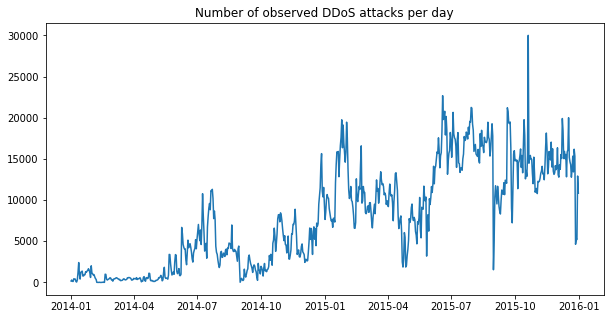

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.date.value_counts().sort_index())
ax.set_title("Number of observed DDoS attacks per day")

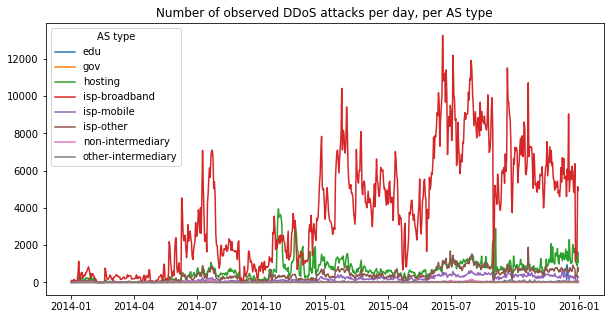

In [48]:
# number of attacks per day, per AS type

nrAttacksPerASType = (df[["as_type", "date"]].groupby("date")
                                             .as_type.value_counts()
                                             .unstack().fillna(0))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(nrAttacksPerASType)
ax.set_title("Number of observed DDoS attacks per day, per AS type")
ax.legend(nrAttacksPerASType.columns.tolist(), title="AS type")

In [58]:
# AS victims, ISP broadband & hosting

asesHosting = df.loc[df["as_type"] == "hosting"]
asesIspBroadband = df.loc[df["as_type"] == "isp-broadband"]

In [89]:
asesHostingTop10 = asesHosting.org.value_counts()[:10]

In [106]:
asesHostingTop10

OVH SAS                        141335
OVH Hosting                     75347
NSS S.A.                        52311
Hetzner Online AG               16082
Amazon.com                      13511
Iliad Hosting                    9436
Limestone Networks               9157
Server Block                     8351
Iliad Entreprises Customers      8047
SingleHop                        6685
Name: org, dtype: int64

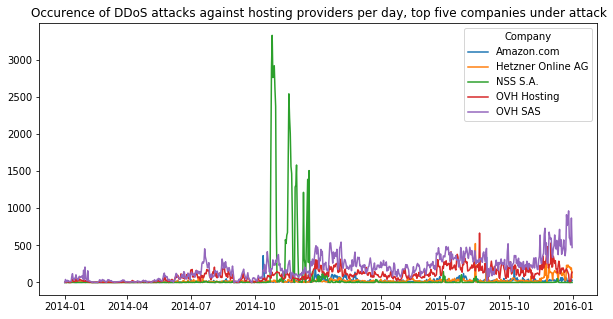

In [114]:
# number of attacks against hosting providers per day, per org

nrAttacksHostingPerOrg = (asesHosting.loc[asesHosting.org.isin( asesHostingTop10.index.tolist()[:5])][["org", "date"]]
                                     .groupby("date")
                                     .org.value_counts()
                                     .unstack()
                                     .fillna(0))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(nrAttacksHostingPerOrg)
ax.set_title("Occurence of DDoS attacks against hosting providers per day, top five companies under attack")
# ax.set_yscale('log')
ax.legend(nrAttacksHostingPerOrg.columns.tolist(), title="Company")
ax.figure.savefig("images/nrAttacksHostingTopFiveOrgs.png")

In [82]:
asesRawAsAmazon = asesHosting.loc[asesHosting.raw_as.str.contains("Amazon")]

asesRawAsAmazon.loc[asesRawAsAmazon.org == "Facebook"].iloc[0]

target_ip                                                     54.83.222.105
date                                                    2015-11-19 00:00:00
sensor_id                                                         sensor005
service                                                                 dns
start_time                                              2015-11-19 12:10:38
stop_time                                               2015-11-19 12:13:55
duration                                                                197
packets                                                                 993
raw_country                                                   United States
raw_as                                       AS14618 Amazon.com<comma> Inc.
raw_hostname                      ec2-54-83-222-105.compute-1.amazonaws.com
udp_port_list                                                      [137298]
pyasn_as                                                              14618
pyasn_as_bgp